In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("train.csv")
y = pd.read_csv("test.csv")

In [4]:
X.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
y.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [6]:
print(X.shape)
print(y.shape)

(750000, 18)
(250000, 17)


In [7]:
X.value_counts()

id      age  job          marital   education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  y
0       42   technician   married   secondary  no        7       no       no    cellular  25   aug    117       3         -1     0         unknown   0    1
1       38   blue-collar  married   secondary  no        514     no       no    unknown   18   jun    185       1         -1     0         unknown   0    1
2       36   blue-collar  married   secondary  no        602     yes      no    unknown   14   may    111       2         -1     0         unknown   0    1
3       27   student      single    secondary  no        34      yes      no    unknown   28   may    10        2         -1     0         unknown   0    1
4       26   technician   married   secondary  no        889     yes      no    cellular  3    feb    902       1         -1     0         unknown   1    1
                                                                     

In [8]:
y.value_counts()

id      age  job            marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome
750000  32   blue-collar    married  secondary  no        1397    yes      no    unknown   21   may    224       1         -1     0         unknown     1
750001  44   management     married  tertiary   no        23      yes      no    cellular  3    apr    586       2         -1     0         unknown     1
750002  36   self-employed  married  primary    no        46      yes      yes   cellular  13   may    111       2         -1     0         unknown     1
750003  58   blue-collar    married  secondary  no       -1380    yes      yes   unknown   29   may    125       1         -1     0         unknown     1
750004  28   technician     single   secondary  no        1950    yes      no    cellular  22   jul    181       1         -1     0         unknown     1
                                                                                 

In [9]:
X.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
y.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [11]:
X.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [12]:
y.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [14]:
cols_x = X.select_dtypes(include =['object']).columns
col_y = y.select_dtypes(include =['object']).columns


In [16]:
for col in cols_x:
    print(f"{col}: {X[col].unique()}")

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [17]:
for col in col_y:
    print(f'{col}: {y[col].unique()}')

job: ['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'apr' 'jul' 'jan' 'feb' 'aug' 'nov' 'jun' 'sep' 'oct' 'mar' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [18]:
X_num = X.select_dtypes(include =['int64','float64']).columns
y_num = y.select_dtypes(include =['int64','float64']).columns

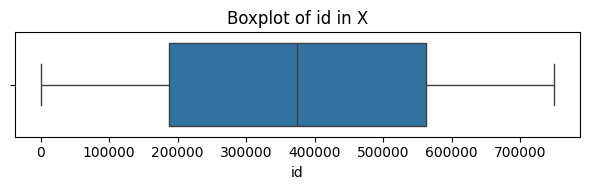

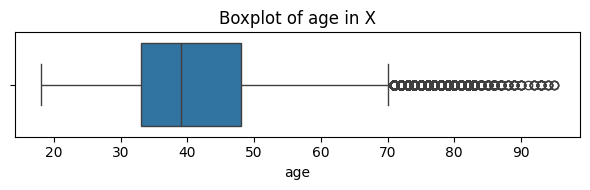

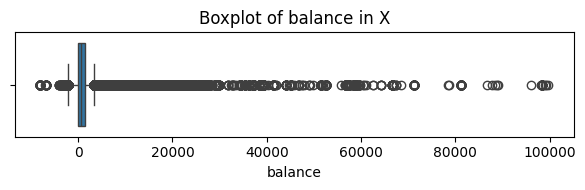

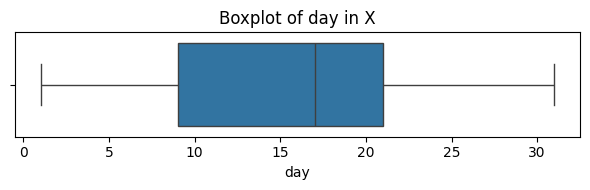

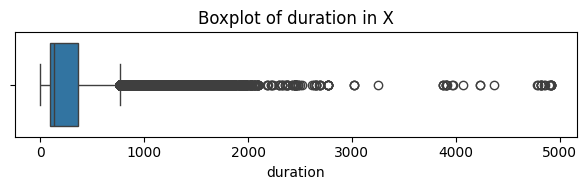

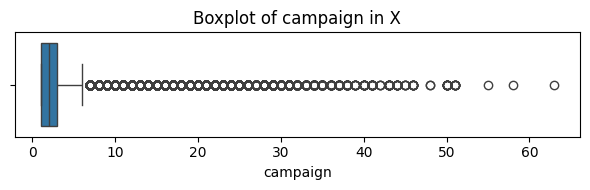

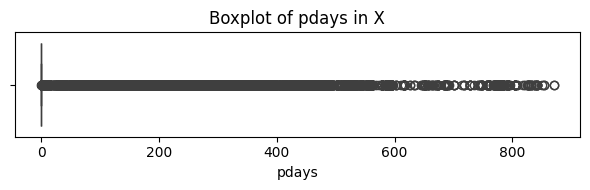

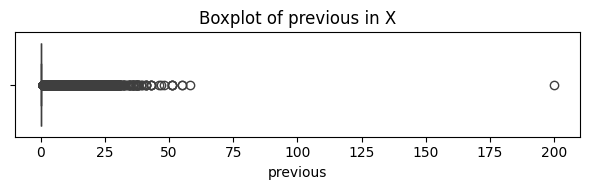

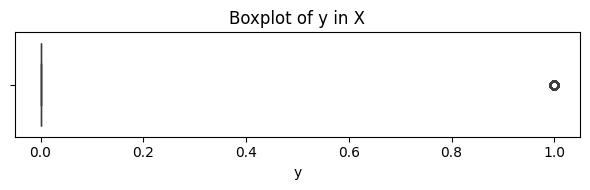

In [20]:
for col in X_num:
    plt.figure(figsize = (6,2))
    sns.boxplot(x = X[col])
    plt.title(f'Boxplot of {col} in X')
    plt.tight_layout()
    plt.show()

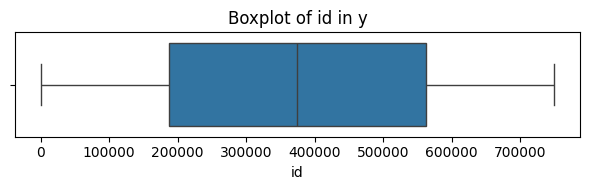

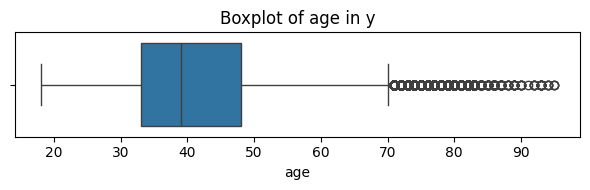

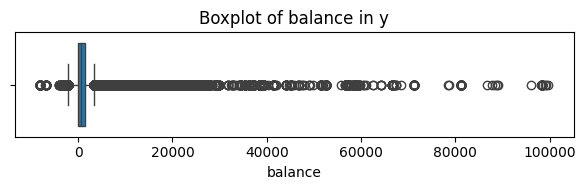

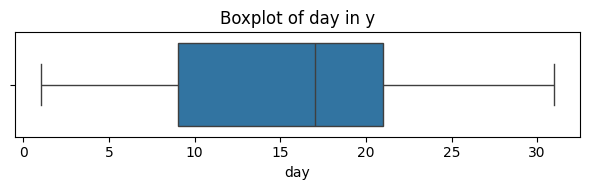

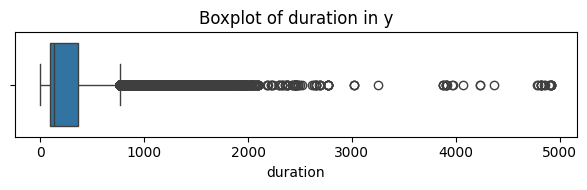

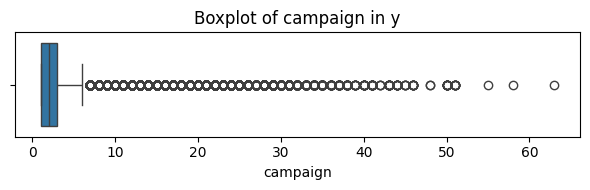

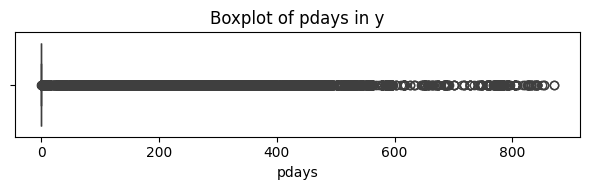

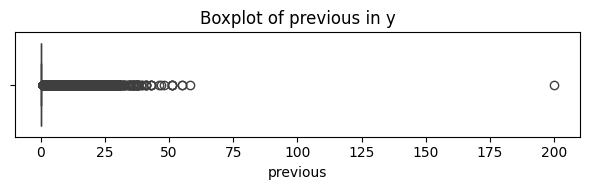

In [22]:
for col in y_num:
    plt.figure(figsize = (6,2))
    sns.boxplot(x = X[col])
    plt.title(f'Boxplot of {col} in y')
    plt.tight_layout()
    plt.show()

In [5]:
num = X.select_dtypes(include =['int64','float64']).columns

In [ ]:
X[num].skew()

id          1.377614e-16
age         5.861373e-01
balance     1.230412e+01
day         5.401418e-02
duration    2.048776e+00
campaign    4.810437e+00
pdays       3.625049e+00
previous    1.374989e+01
y           2.329296e+00
dtype: float64

In [4]:
X.drop('id', axis=1, inplace=True)
y.drop('id', axis=1, inplace=True)

In [5]:
X.to_csv('clean_train.csv', index=False)
y.to_csv('clean_clean.csv', index=False)